## Consensus 

In [1]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In regular consensus, the dynamics are given by

$\dot{x} = -L(G) x $

where $L(G)$ refers to the Laplacian of the graph. 

The following section shows the Laplacian of the path graph.

In [2]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)


def Laplacian(N=5,gtype=2):
    
    if gtype ==1:# Graph is a complete graph
        L = -1*np.ones((N,N))
        for i in range(N):
            L[i,i]=N-1
    elif gtype ==2: # Graph is a path graph
        a = -1*np.ones(N-1)
        b = 2*np.ones(N)
        L = tridiag(a,b,a)
        L[0,0]=1
        L[N-1,N-1]=1
    elif gtype ==3: # Graph is a star graph
        L = np.zeros((N,N))
        L[0]=-1*np.ones(N)
        L[0,0]=N-1
        for i in range(1,N):
            L[i,0]=-1
            L[i,i]=1
        
    return L
print(Laplacian(gtype=2))

[[ 1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


With the Laplacian, we can simulate the dynamics. 

The dynamics do depend on the type of graph. A completely connected graph has a larger $\lambda_2$ and consensus is reached faster than a path graph.

We start with 5 random numbers on a path graph.

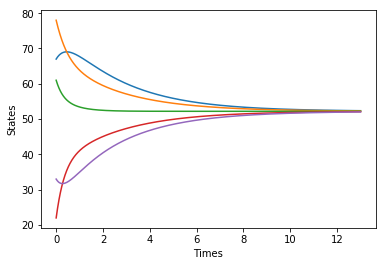

In [3]:

N =5
gtype =2
a= np.random.randint(100,size=N) #initial condition
dt =0.01
tspace = np.linspace(0,13,int(13/dt))
def flow(X,t,N=5,gtype =2):
    L = Laplacian(N,gtype)
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace, args =(N,gtype))
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
plt.show()

Now, the complete graph

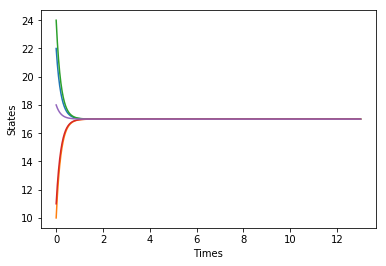

In [4]:
N =5
gtype =1
a= np.random.randint(100,size=N) #initial condition
dt =0.01
tspace = np.linspace(0,13,int(13/dt))
def flow(X,t,N=5,gtype =2):
    L = Laplacian(N,gtype)
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace, args =(N,gtype))
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
plt.show()

Thus, nodes on a complete graph arrive at consensus quicker than the path (because of $\lambda_2$)

## Rebel Nodes

What if you had a node that didn't change ? Such a rebel node would change dynamics considerably.
Let's start with one rebel node.

### One rebel node

All the nodes attempt to converge to a single value but one node refuses to change. So, all nodes converges to the rebel value. 

In [86]:
N=15
gtype =2
L = Laplacian(N,gtype)
for i in [3]: #rebel nodes
    L[i]=np.zeros(N)

[4 7 5 5 7 6 7 7 4 6 1 9 2 1 0]
[ 5.          5.          5.          5.          4.98114258  4.96263644
  4.94482631  4.92804396  4.91260202  4.89878813  4.88685964  4.87703873
  4.86950836  4.8644088   4.86183505]


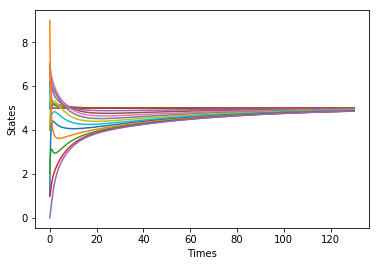

In [99]:
a= np.random.randint(10,size=N) #initial condition
dt =0.01
print(a)
tspace = np.linspace(0,130,int(13/dt))
def flow(X,t):
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
print(asol[-1])
plt.show()

### Two rebel nodes

That was expected. But what happens with two or more rebel nodes ?

Surprisingly, the answer depends on the kind of graph.

##### A path graph with two rebels on adjacent nodes

[99 28 47  2 32 95  5 30 38 82 94 40  3 34 58]
[  2.           2.           2.           2.          32.          32.03069611
  32.06070651  32.08936084  32.11601899  32.14008546  32.16102266
  32.17836288  32.19171877  32.20079198  32.20537982]


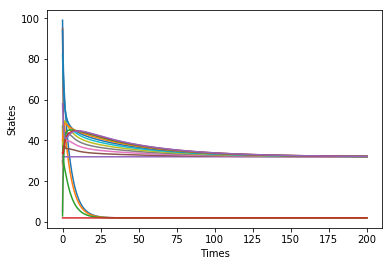

In [110]:
N=15
gtype =2
L = Laplacian(N,gtype)
for i in [3,4]:
    L[i]=np.zeros(N)
a= np.random.randint(100,size=N) #initial condition
dt =0.01
print(a)
tspace = np.linspace(0,200,int(13/dt))
def flow(X,t):
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
print(asol[-1])
plt.show()

That resulted in two polarized groups literally on either sides of the two nodes.

##### A path graph with two rebels separated by one node

[25 69  9 77 47 47 59 95 99 35 62 78 17 34 98]
[ 76.99999985  76.99999988  76.99999993  77.          62.          47.
  47.18727032  47.3694324   47.54151732  47.69883107  47.83708251
  47.95250055  48.04193683  48.10295181  48.13388112]


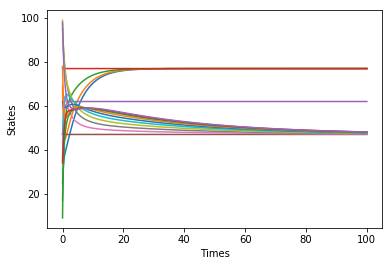

In [107]:
N=15
gtype =2
L = Laplacian(N,gtype)
for i in [3,5]:
    L[i]=np.zeros(N)
a= np.random.randint(100,size=N) #initial condition
dt =0.01
print(a)
tspace = np.linspace(0,100,int(13/dt))
def flow(X,t):
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
print(asol[-1])
plt.show()

The middle node is the average of the two values.

##### A path graph with two rebels separated by 3 nodes


[84 98  6  3 47 72 74 82 85 99 29 82 95 73 70]
[  3.00000021   3.00000017   3.00000009   3.          22.75        42.5
  62.25        82.          81.97696954  81.95494562  81.93489079
  81.91768155  81.90407002  81.89465109  81.88983641]


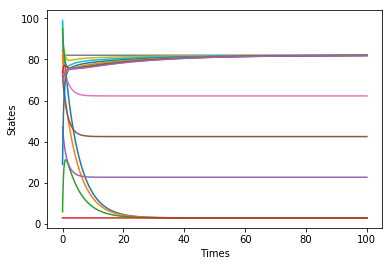

In [109]:
N=15
gtype =2
L = Laplacian(N,gtype)
for i in [3,7]:
    L[i]=np.zeros(N)
a= np.random.randint(100,size=N) #initial condition
dt =0.01
print(a)
tspace = np.linspace(0,100,int(13/dt))
def flow(X,t):
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
print(asol[-1])
plt.show()

The 3 middle nodes divide the difference evenly while the rest of the nodes are polarized on either sides.

Now, what about a complete/star graph ?

#### A complete graph with 2 rebel nodes

[54 58 81 47 27 86  5 85 62 13 72 26 29 23 27]
[ 65.99999975  65.99999975  65.99999975  47.          65.99999975
  65.99999975  65.99999975  85.          65.99999975  65.99999975
  65.99999975  65.99999975  65.99999975  65.99999975  65.99999975]


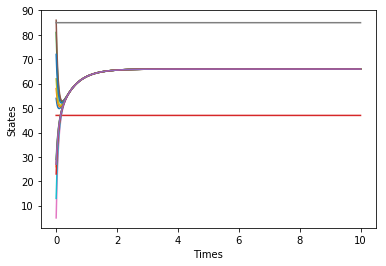

In [117]:
N=15
gtype =1
L = Laplacian(N,gtype)
for i in [3,7]:
    L[i]=np.zeros(N)
a= np.random.randint(100,size=N) #initial condition
dt =0.01
print(a)
tspace = np.linspace(0,10,int(13/dt))
def flow(X,t):
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
print(asol[-1])
plt.show()

All nodes apart from the rebel nodes average out. It's the same for a star graph.

Unless the rebel is at the centre of the star, then all states except one become the central value.

[35 15 34 59 51 81 41 83 14 23  3 45 53 32  2]
[ 35.          34.99909199  34.9999546   35.00108961  35.00072641
  35.00208842  35.0002724   83.          34.99904659  34.99945519
  34.99854719  35.000454    35.00081721  34.9998638   34.99850178]


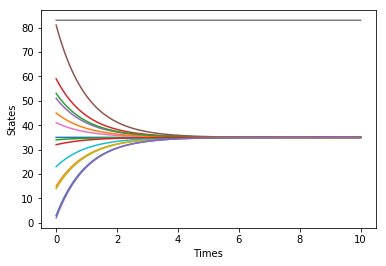

In [119]:
N=15
gtype =3
L = Laplacian(N,gtype)
for i in [0,7]:
    L[i]=np.zeros(N)
a= np.random.randint(100,size=N) #initial condition
dt =0.01
print(a)
tspace = np.linspace(0,10,int(13/dt))
def flow(X,t):
    return -L.dot(X)
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
print(asol[-1])
plt.show()

This may be pretty obvious but running consensus creatively with rebel nodes on unknown graphs can help identify the nature of the graphs

### Consensus with forcing

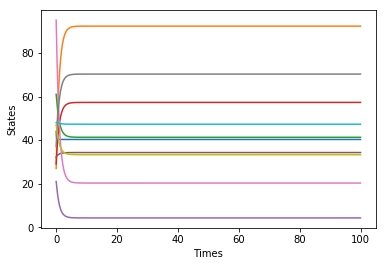

44.1
[ 40.3  92.3  41.3  57.3   4.3  34.3  20.3  70.3  33.3  47.3]


array([45, 97, 46, 62,  9, 39, 25, 75, 38, 52])

In [146]:
N=10
gtype =3
L = Laplacian(N,gtype)
#a= np.random.randint(100,size=N) #initial condition
dt =0.01
#a1 = np.random.randint(100,size=N) 
v = np.dot(L,a1)
tspace = np.linspace(0,100,int(13/dt))
def flow(X,t):
    return -L.dot(X)+v
asol = integrate.odeint(flow,a , tspace)
plt.plot(tspace,asol)
plt.ylabel('States')
plt.xlabel('Times')
plt.show()
print(np.sum(a)/N)
print(asol[-1])
a1